Selection des données

In [12]:
import pandas as pd

df1 = pd.read_csv('datasets/fires.csv', header=0)
df2 = pd.read_csv('datasets/weatherAUS.csv', header=0, usecols=['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall'])

print(df1)

         Unnamed: 0   latitude   longitude    acq_date
0                 0 -32.756947  116.403992  2012-01-20
1                 1 -19.767071  147.392746  2012-01-20
2                 2 -19.772953  147.380814  2012-01-20
3                 3 -23.693417  147.555527  2012-01-20
4                 4 -24.239748  147.038422  2012-01-20
...             ...        ...         ...         ...
2499995     2499995 -12.968535  134.165405  2013-06-30
2499996     2499996 -12.969051  134.169708  2013-06-30
2499997     2499997 -12.962164  134.161880  2013-06-30
2499998     2499998 -12.966002  134.159805  2013-06-30
2499999     2499999 -12.966486  134.164124  2013-06-30

[2500000 rows x 4 columns]


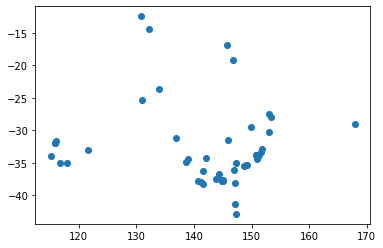

In [25]:
import matplotlib.pyplot as plt

df3 = pd.read_csv('datasets/stationsCoordinates.csv')

X = df3['Longitude'].tolist()
Y = df3['Latitude'].tolist()

plt.scatter(X, Y)
plt.show()